In [1]:
import re
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import accuracy_score
from sklearn.multiclass import OneVsRestClassifier
from nltk.corpus import stopwords
from sklearn.svm import LinearSVC
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from nltk.stem import WordNetLemmatizer
import string
from sklearn import svm
from sklearn.neural_network import MLPClassifier

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\utils\__init__.py:4: DeprecationWarning: Using or importing the ABCs from 'collections' instead of from 'collections.abc' is deprecated, and in 3.8 it will stop working
  from collections import Sequence


In [2]:
df = pd.read_excel(r"Downloads\Test1 (2).xlsx", sheet_name="Sheet1")
df.shape

(5531, 6)

In [3]:
df_toxic = df.drop(['Comments'], axis=1)
counts = []
categories = list(df_toxic.columns.values)
for i in categories:
    counts.append((i, df_toxic[i].sum()))
df_stats = pd.DataFrame(counts, columns=['category', 'number_of_comments'])
df_stats

,category,number_of_comments
0,Teacher,1116
1,Class,1682
2,Assessment,1218
3,Resource,766
4,Other,1823


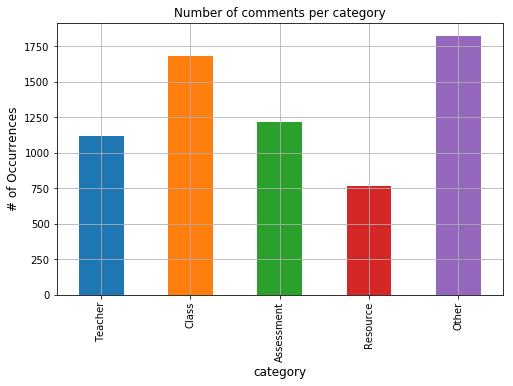

In [4]:
ax = df_stats.plot(x='category', y='number_of_comments', kind='bar', legend=False, grid=True, figsize=(8, 5))
plt.title("Number of comments per category")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('category', fontsize=12)
fig = plt.gcf()

1    4586
2     789
3     123
4      18
0      15
dtype: int64


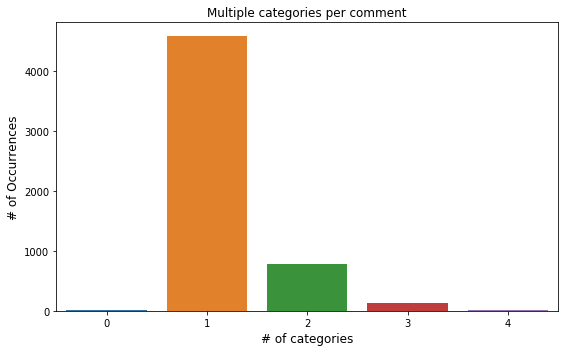

In [5]:
rowsums = df.iloc[:,1:].sum(axis=1)
x=rowsums.value_counts()
print (x)
#plot
plt.figure(figsize=(8,5))
ax = sns.barplot(x.index, x.values)
plt.title("Multiple categories per comment")
plt.ylabel('# of Occurrences', fontsize=12)
plt.xlabel('# of categories', fontsize=12)
fig = plt.gcf()
fig.tight_layout()

Text(0.5,1,'Comment length distrubtion')

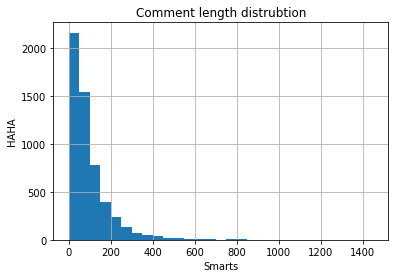

In [6]:
lens = df.Comments.str.len()
lens = lens.hist(bins = np.arange(0,1500,50))
lens.set_xlabel('Smarts')
lens.set_ylabel('HAHA')
lens.set_title('Comment length distrubtion')

In [7]:
print('Percentage of comments that are not labelled:')
print(len(df[(df['Teacher']==0) & (df['Class']==0) & (df['Assessment']==0) & (df['Resource']== 0) & (df['Other']==0) ]) / len(df))


Percentage of comments that are not labelled:
0.002711986982462484


In [8]:
def clean_text(text):
    
    ## Remove puncuation
    text = text.translate(string.punctuation)
    
    ## Convert words to lower case and split them
    text = text.lower().split()
    
    ## Remove stop words
    stops = set(stopwords.words("english"))
    text = [w for w in text if not w in stops and len(w) >= 3]
    
    text = " ".join(text)
    ## Clean the text
    text = re.sub(r"[^A-Za-z0-9^,!.\/'+-=]", " ", text)
    text = re.sub(r"what's", "what is ", text)
    text = re.sub(r"\'s", " ", text)
    text = re.sub(r"\'ve", " have ", text)
    text = re.sub(r"n't", " not ", text)
    text = re.sub(r"i'm", "i am ", text)
    text = re.sub(r"\'re", " are ", text)
    text = re.sub(r"\'d", " would ", text)
    text = re.sub(r"\'ll", " will ", text)
    text = re.sub(r",", " ", text)
    text = re.sub(r"\.", " ", text)
    text = re.sub(r">", " ", text)
    text = re.sub(r"<", " ", text)
    text = re.sub(r"!", " ", text)
    text = re.sub(r":", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\/", " ", text)
    text = re.sub(r"\^", " ", text)
    text = re.sub(r"\+", " ", text)
    text = re.sub(r"\-", " ", text)
    text = re.sub(r"\=", " ", text)
    text = re.sub(r"'", " ", text)
    text = re.sub(r"(\d+)(k)", r"\g<1>000", text)
    text = re.sub(r":", " : ", text)
    text = re.sub(r" e g ", " eg ", text)
    text = re.sub(r" b g ", " bg ", text)
    text = re.sub(r" u s ", " american ", text)
    text = re.sub(r"\0s", "0", text)
    text = re.sub(r" 9 11 ", "911", text)
    text = re.sub(r"e - mail", "email", text)
    text = re.sub(r"j k", "jk", text)
    text = re.sub(r"\s{2,}", " ", text)
    ## Stemming
    text = text.split()
    lemmatizer = WordNetLemmatizer()
    lemmatized_words = [lemmatizer.lemmatize(word) for word in text]
    text = " ".join(lemmatized_words)
    return text

# apply the above function to df['text']
df['Comments'] = df['Comments'].map(lambda x: clean_text(x))

In [9]:
categories = ['Teacher', 'Class', 'Assessment', 'Resource', 'Other']
train, test = train_test_split(df, random_state=42, test_size=0.1, shuffle=True)
X_train = train.Comments
X_test = test.Comments
print(X_train.shape)
print(X_test.shape)

(4977,)
(554,)


In [10]:
SVC_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(LinearSVC(penalty='l2', loss='hinge', dual=True, tol=0.0001, C=1, multi_class='ovr', fit_intercept=True, intercept_scaling=1, class_weight=None, verbose=0, random_state=42, max_iter=1000), n_jobs=-1)),
            ])
#for category in categories:
#    print('... Processing {}'.format(category))
#    # train the model using X_dtm & y
#    SVC_pipeline.fit(X_train, train[category])
#    # compute the testing accuracy
#    prediction = SVC_pipeline.predict(X_test)
#    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

In [11]:
SGD_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(SGDClassifier(loss='hinge', penalty='l2',alpha=1e-3, max_iter=5, random_state=42), n_jobs=1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    SGD_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = SGD_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Teacher
Test accuracy is 0.9043321299638989
... Processing Class
Test accuracy is 0.9133574007220217
... Processing Assessment
Test accuracy is 0.9025270758122743
... Processing Resource
Test accuracy is 0.8808664259927798
... Processing Other
Test accuracy is 0.8050541516245487


In [12]:
MLPClassifier_pipeline = Pipeline([
                ('tfidf', TfidfVectorizer()),
                ('clf', OneVsRestClassifier(MLPClassifier(hidden_layer_sizes=(100,),solver='lbfgs', alpha=1e-5, random_state=1), n_jobs=-1)),
            ])
for category in categories:
    print('... Processing {}'.format(category))
    # train the model using X_dtm & y
    MLPClassifier_pipeline.fit(X_train, train[category])
    # compute the testing accuracy
    prediction = MLPClassifier_pipeline.predict(X_test)
    print('Test accuracy is {}'.format(accuracy_score(test[category], prediction)))

... Processing Teacher
Test accuracy is 0.8808664259927798
... Processing Class
Test accuracy is 0.8953068592057761
... Processing Assessment
Test accuracy is 0.9350180505415162
... Processing Resource
Test accuracy is 0.8916967509025271
... Processing Other
Test accuracy is 0.796028880866426


In [13]:
#docs_new = "I really enjoyed having the flexibility in research, as there was no restriction as to what sources we could utilize for the major assessment. i also liked the weekly seminars, they where useful to engage with the teacher on how we where going as a group on the major assignment and what other groups where doing."
#docs_new = clean_text(docs_new)
#docs_new = [docs_new]
#print(docs_new)
#for category in categories:
#    MLPClassifier_pipeline.fit(X_train, train[category])
#    print (MLPClassifier_pipeline.predict(docs_new))
#print ('----')
#for category in categories:
#    SGD_pipeline.fit(X_train, train[category])
#    print (SGD_pipeline.predict(docs_new))
#print ('----')
#for category in categories:
#    SVC_pipeline.fit(X_train, train[category])
#    print (SVC_pipeline.predict(docs_new))

In [14]:
docs_new = "WEEKLY QUIZ! The quiz is really good to help with the learning and revision, sometimes we don't know that such thing information exists in the lecture notes because of the huge load of content, the quiz helps to break it down and touch on stuffs that we often overlook.<> LAB! feels like we are conducting treatment at a hospital, at the same time having ""free"" check up when we participate as subject in the experiment (e.g respiration exp)"

docs_new = clean_text(docs_new)
docs_new = [docs_new]
print(docs_new)
print ('----')
for category in categories:
    SVC_pipeline.fit(X_train, train[category])
    print (SVC_pipeline.predict(docs_new))

['weekly quiz quiz really good help learning revision sometimes know thing information exists lecture note huge load content quiz help break touch stuff often overlook lab feel like conducting treatment hospital time free check participate subject experiment eg respiration exp']
----
[0]
[1]
[1]
[1]
[0]


In [15]:
docs_new = "WEEKLY QUIZ!"

docs_new = clean_text(docs_new)
docs_new = [docs_new]
print(docs_new)
print ('----')
for category in categories:
    SVC_pipeline.fit(X_train, train[category])
    print (SVC_pipeline.predict(docs_new))

['weekly quiz']
----
[0]
[0]
[1]
[0]
[0]


In [16]:
docs_new = "The quiz is really good to help with the learning and revision,"

docs_new = clean_text(docs_new)
docs_new = [docs_new]
print(docs_new)
print ('----')
for category in categories:
    SVC_pipeline.fit(X_train, train[category])
    print (SVC_pipeline.predict(docs_new))

['quiz really good help learning revision']
----
[0]
[0]
[1]
[0]
[0]


In [17]:
docs_new = "sometimes we don't know that such thing information exists in the lecture notes because of the huge load of content,"

docs_new = clean_text(docs_new)
docs_new = [docs_new]
print(docs_new)
print ('----')
for category in categories:
    SVC_pipeline.fit(X_train, train[category])
    print (SVC_pipeline.predict(docs_new))

['sometimes know thing information exists lecture note huge load content']
----
[0]
[1]
[0]
[0]
[0]


In [18]:
docs_new = "the quiz helps to break it down and touch on stuffs that we often overlook."

docs_new = clean_text(docs_new)
docs_new = [docs_new]
print(docs_new)
print ('----')
for category in categories:
    SVC_pipeline.fit(X_train, train[category])
    print (SVC_pipeline.predict(docs_new))

['quiz help break touch stuff often overlook']
----
[0]
[0]
[0]
[0]
[0]


In [19]:
docs_new = "<> LAB! feels like we are conducting treatment at a hospital,"

docs_new = clean_text(docs_new)
docs_new = [docs_new]
print(docs_new)
print ('----')
for category in categories:
    SVC_pipeline.fit(X_train, train[category])
    print (SVC_pipeline.predict(docs_new))

['lab feel like conducting treatment hospital']
----
[0]
[1]
[0]
[0]
[0]


In [20]:
docs_new = ' at the same time having "free" check up when we participate as subject in the experiment (e.g respiration exp)'

docs_new = clean_text(docs_new)
docs_new = [docs_new]
print(docs_new)
print ('----')
for category in categories:
    SVC_pipeline.fit(X_train, train[category])
    print (SVC_pipeline.predict(docs_new))

['time free check participate subject experiment eg respiration exp']
----
[0]
[0]
[0]
[0]
[1]
